# Exploring Bank Churn Data

### Importing the necessary libraries 

In [39]:
import matplotlib.pyplot as plt            # to visualise
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [ ]:
# Ensure that the data file is in the current working directory as that of the jupyter notebook

df = pd.read_csv("S2_BankChurn_Data.csv") # read_csv: inbuilt function of pandas to read files 

In [41]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [42]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Dependent_count           Credit_Limit
Education_Level           Total_Revolving_Bal
Marital_Status            Avg_Open_To_Buy
Income_Category           Total_Trans_Amt
Card_Category             Total_Trans_Ct
Months_on_book            Avg_Utilization_Ratio
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


# Levels for Data Exploration

* Level 2 : Bi-Variate Analysis
* Lever 3 : Multivariate Analysis and asking questions from data 

In [43]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Dependent_count           Credit_Limit
Education_Level           Total_Revolving_Bal
Marital_Status            Avg_Open_To_Buy
Income_Category           Total_Trans_Amt
Card_Category             Total_Trans_Ct
Months_on_book            Avg_Utilization_Ratio
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


## Q1. Relationship of Attrition_Flag with Gender


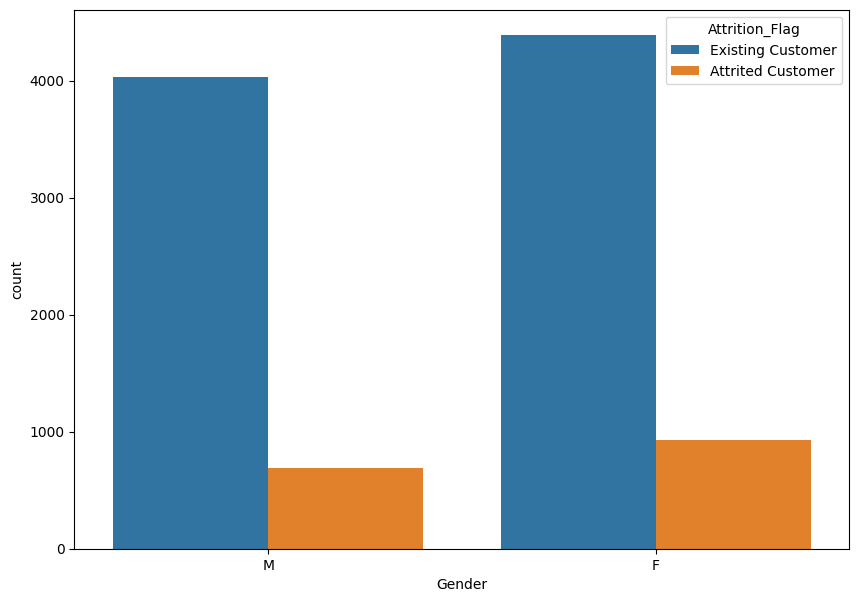

In [44]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Gender", hue = "Attrition_Flag", data = df)
plt.show()

## Interpretation: Percentage of women getting churned out is more than men.

## Q2. Relationship of Attrition_Flag with Dependent_count


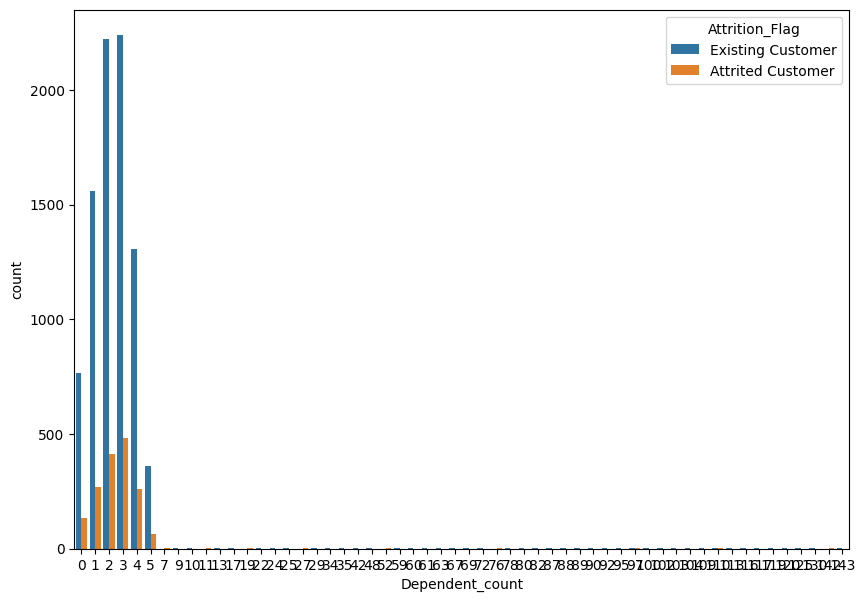

In [45]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Dependent_count", hue = "Attrition_Flag", data = df)
plt.show()

## ***Interpretation: Customers who are attrited or existing have a maximum of 2 to 3 dependents on them.

## Q3. Relationship of Attrition_Flag with Education_Level
Level 2 Categorical to Categorical

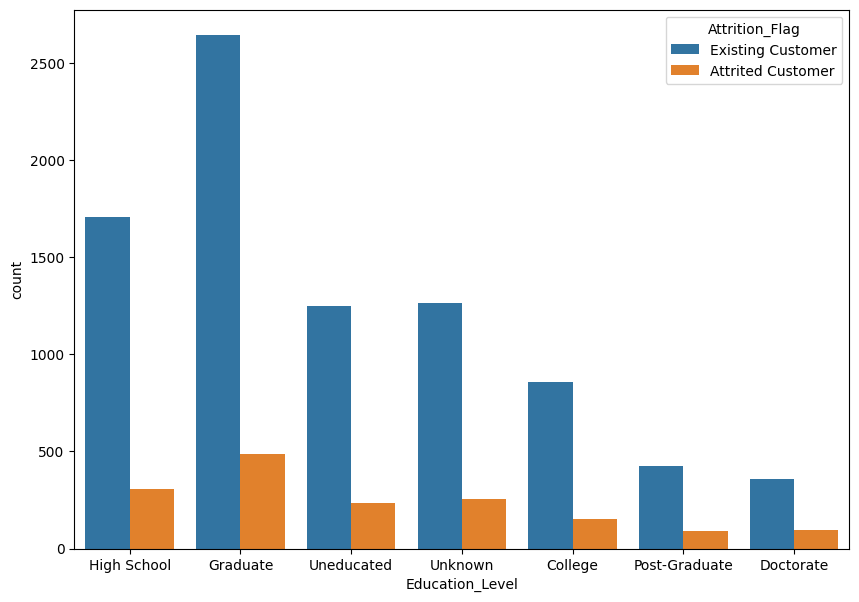

In [46]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Education_Level", hue = "Attrition_Flag", data = df)
plt.show()

## ***Interpretation: Graduate and High School customers have a higher Attrition rate compared to another education level. 

## Q4. Relationship of Attrition_Flag with Income_Category
Level 2 Categorical to Categorical

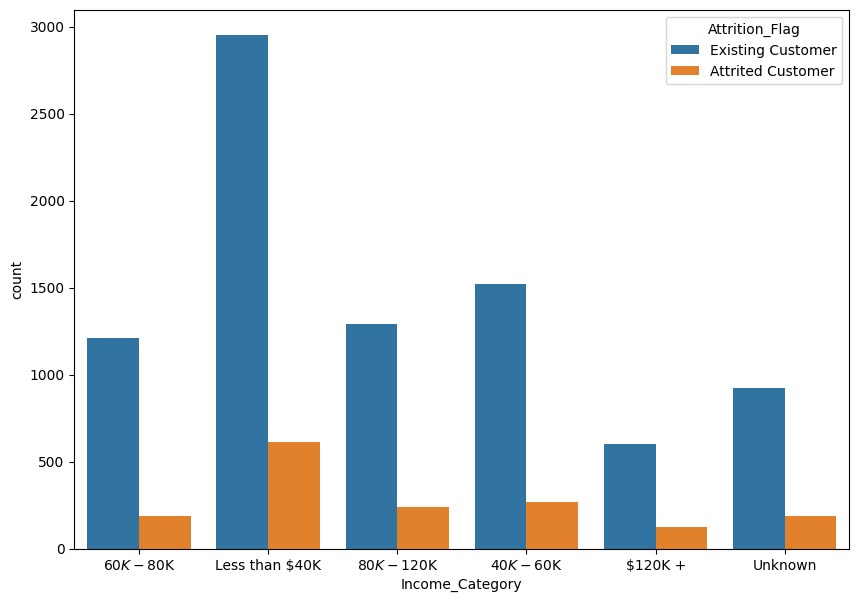

In [47]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Income_Category", hue = "Attrition_Flag", data = df)
plt.show()


## ***Interpretation: Almost 20-30% of customers who attrited are earning less than $40,000.

## Q5. Relationship of Attrition_Flag with Card_Category
Level 2 Categorical to Categorical

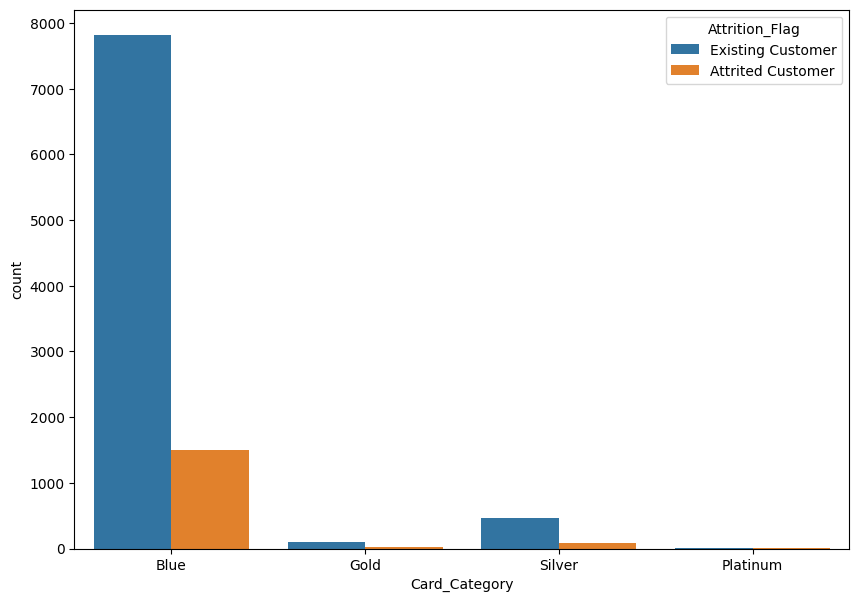

In [48]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Card_Category", hue = "Attrition_Flag", data = df)
plt.show()


## ***Interpretation: Majority of the customers are churning from the blue card category. It is also to be noted that the maximum customers are also blue card holders. 

## CAT NUM ANALYSIS: Categorical to continuous

In [49]:
continuous  # to check the names of the continuous columns

['CLIENTNUM',
 'Customer_Age',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

## Q6. Relationship of Attrition_Flag with Customer_Age
Level 2: Categorical to continuous

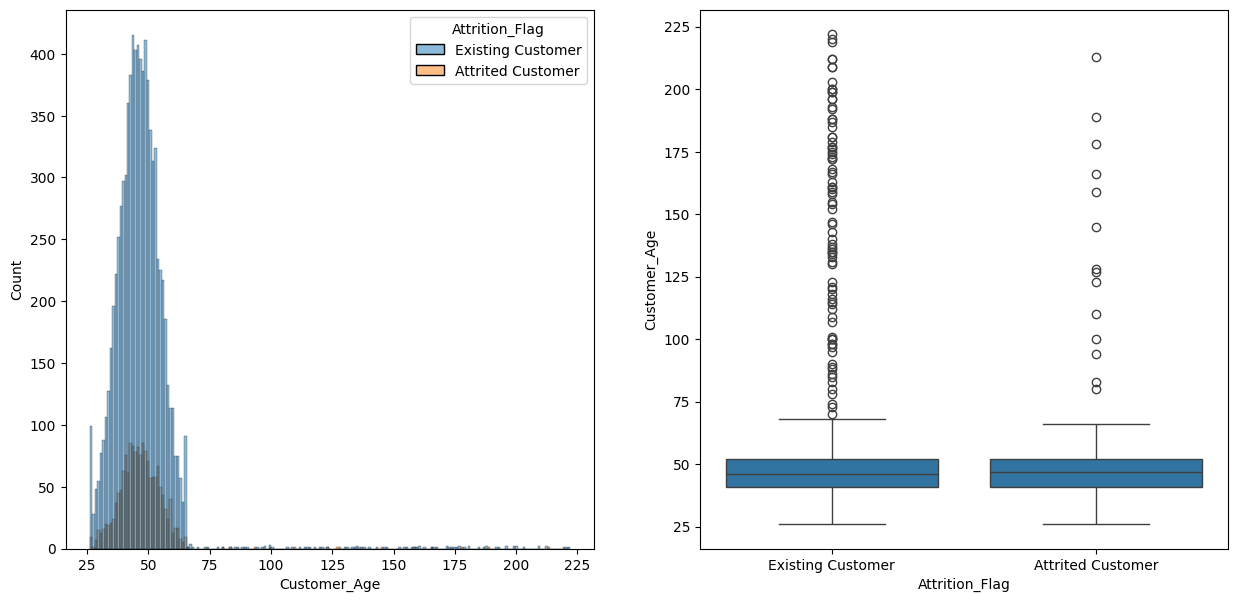

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Customer_Age"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(y = df["Customer_Age"], x = df["Attrition_Flag"], ax = ax[1])
plt.show()

## ***Interpretation: Most of the bank customers  are between 40 to 50 years of age. 

## Q7. Relationship of Attrition_Flag with Credit_Limit
Level 2: Categorical to continuous

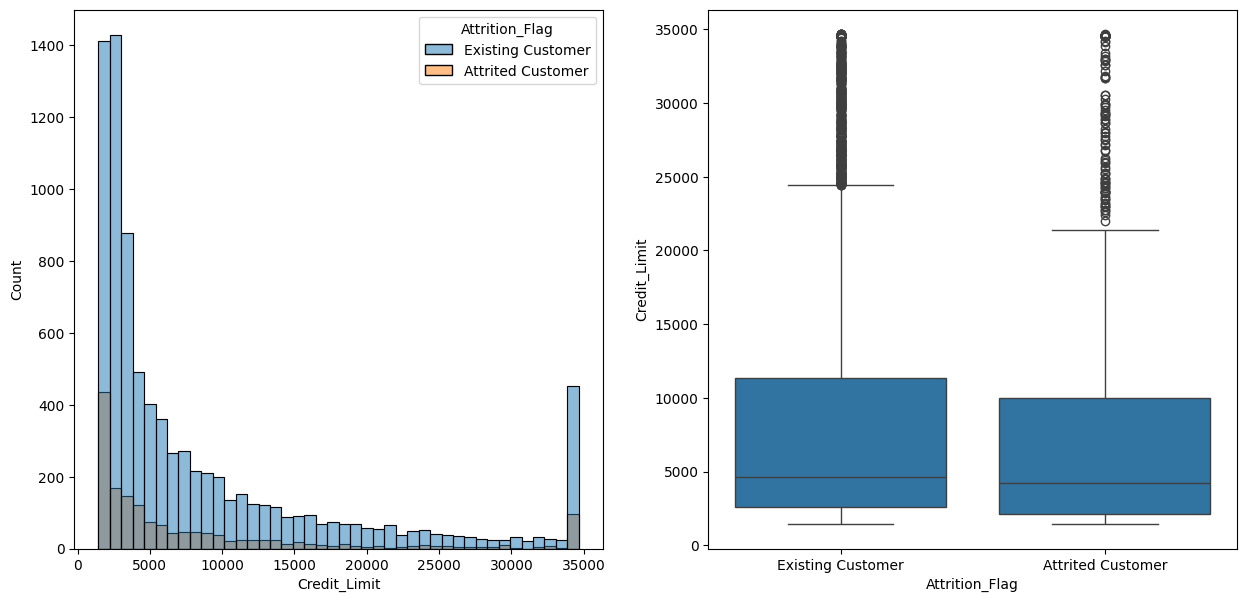

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Credit_Limit"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = df["Attrition_Flag"] ,y = df["Credit_Limit"] , ax = ax[1])
plt.show()

This is a right skewed data.
## ***Interpretation: There is not a significant difference in the credit limit of the existing customers and those who have left the bank. This paves way for interesting analysis as to why customers choose to stay with the bank or leave. 

## Q8. Relationship of Attrition_Flag with Avg_Utilization_Ratio
Level 2: Categorical to continuous

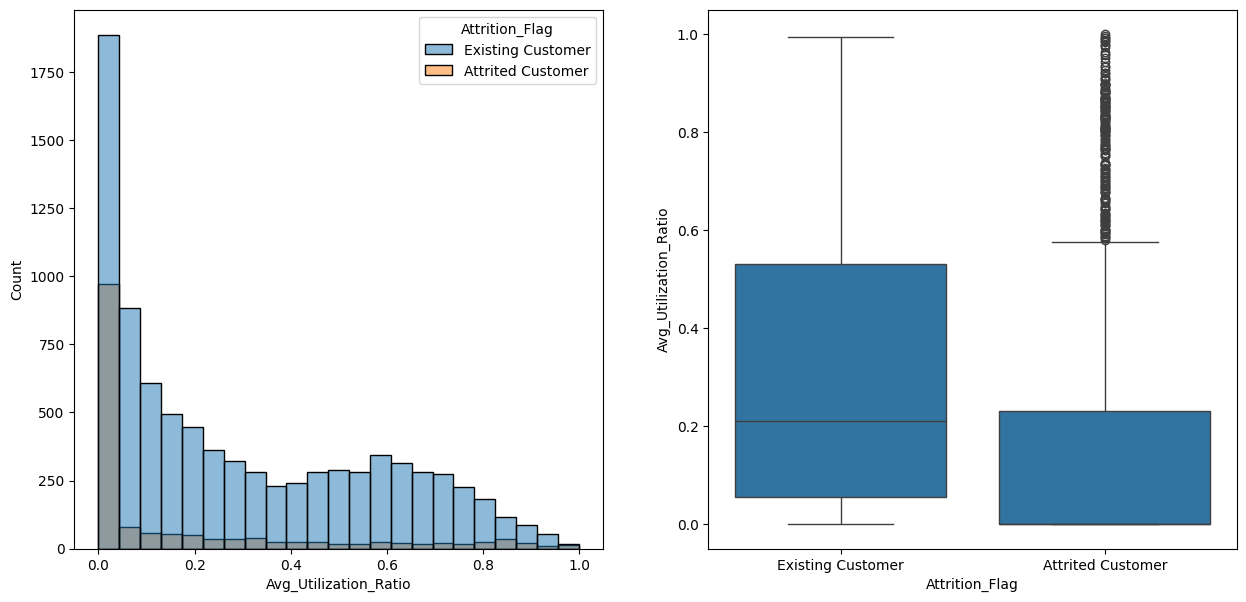

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Avg_Utilization_Ratio"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = df["Attrition_Flag"] ,y = df["Avg_Utilization_Ratio"] , ax = ax[1])
plt.show()

## ***Interpretation: Customers who churned have very low usage. Most of them haven't used their cards. Around  75% of customers who churned have usage only of only 0.2%.